In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from speedml import Speedml


In [19]:
# It takes one line of code to initialize train, test datasets, define the target and unique id variables. 
# This also initializes wrapper components for EDA (sml.plot), XGBoost (sml.xgb), modeling (sml.model), 
# feature engineering (sml.feature) and more...

sml = Speedml('train.csv', 
              'test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

'train (891, 11) | test (418, 10)'

In [20]:
sml.configure('overfit_threshold', 
              sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])


{'outpath': 'output/',
 'outlier_threshold': 3,
 'overfit_threshold': 0.033501260508640406,
 'high_cardinality': 10,
 'unique_ratio': 80}

In [21]:
#Then returning results from just one Speedml method performs quick EDA on the entire dataset.
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


In [24]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


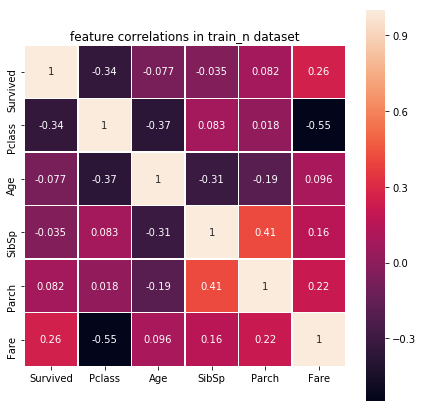

In [11]:
#Feature Correlations
sml.plot.correlate()

<Figure size 432x288 with 0 Axes>

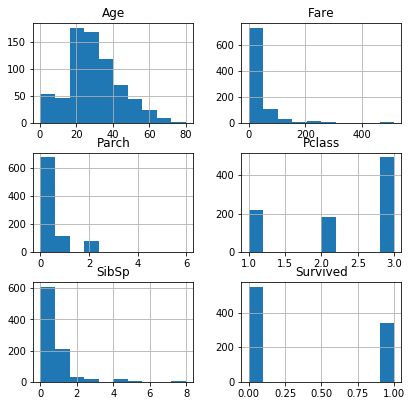

In [26]:
# Outliers Detection and Fix¶
sml.plot.distribute()


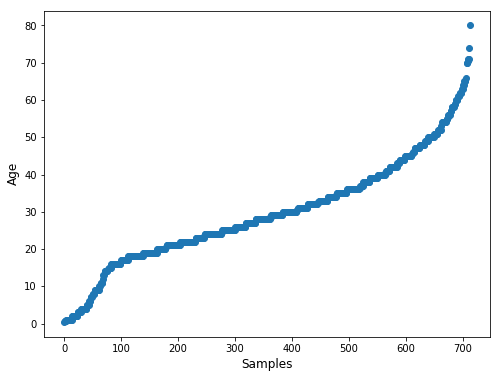

In [13]:
sml.plot.continuous('Age')


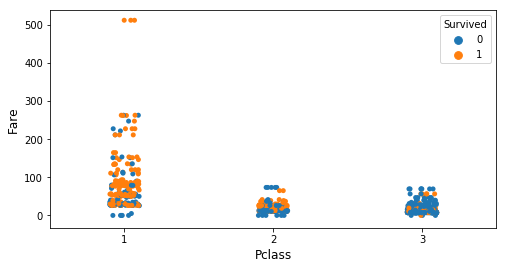

In [14]:
sml.plot.strip('Pclass', 'Fare')

/Users/Preetam/anaconda3/envs/py3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


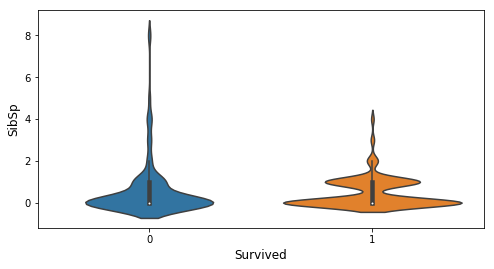

Fixed 7 or 0.79% upper outliers. 


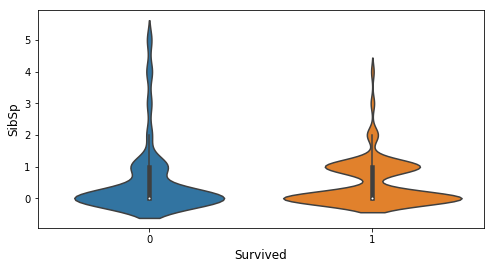

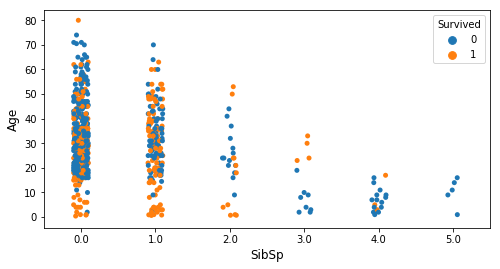

In [15]:
sml.plot.ordinal('SibSp')
print(sml.feature.outliers('SibSp', upper=99))
sml.plot.ordinal('SibSp')
sml.plot.strip('SibSp', 'Age')